In [83]:
import pandas as pd
import numpy as np
import seaborn as np
from matplotlib import pyplot as plt
import re

In [84]:
global measurement

In [85]:
def extract_measurement(b_list):

    # this function extract the data points from B3,B4,B5 and 
    # And return clean data to get_measurment() in dictionay format 
    
    x_spos = b_list.index('LengthValue') # starting index of the x values
    y_spos = b_list.index('Value')# starting index of the y values
    y_epos = len(b_list)# the ending pos of y values
    
    x = b_list[x_spos + 1:y_spos-1]
    y = b_list[y_spos + 1: y_epos -2]

    null_index = set() # a set to keep the index of null values in either x or y
    
    # loop over x and get the index of the 'null' elements
    for index,value in enumerate(x):
        if value == "null":
            null_index.add(index)

    # loop over y and get the index of the 'null' elements
    for index,value in enumerate(y):
        if value == "null":
            null_index.add(index)    
    

    # removing the x,y pair with null value in either of them
    x = [value for idx, value in enumerate(x) if idx not in null_index]
    y = [value for idx, value in enumerate(y) if idx not in null_index]

    # changing the elements of x and y from string to float
    x_float =[float(item) for item in x]
    y_float =[float(item) for item in y]

    xy_dict = dict(zip(x_float,y_float)) # zip x and y  in dictionary
    print(len(xy_dict))
    #print(xy_dict)

    
    


    return xy_dict




def get_measurement(coil_id):

    # this function load the data for B3,B4,B5 measurments
    # It split the data based on ";"
    # It calls extract_measuremnt() function to extract the 
    # clean data pairs for B3,B4,B5
    # And return the values in dictionary format

    print('************************************')
    print("coil Id: ", coil_id)
    root_directory = "data/SampleProcessedData/"

    b3_df = pd.read_csv(root_directory + str(coil_id ) + "B3.csv")
    b4_df = pd.read_csv(root_directory + str(coil_id ) + "B4.csv")
    b5_df = pd.read_csv(root_directory + str(coil_id ) + "B5.csv")

    b3_list = re.split(';', str(b3_df.columns))
    b4_list = re.split(';', str(b4_df.columns))
    b5_list = re.split(';', str(b5_df.columns))

    b_lists = [b3_list,b4_list,b5_list]

    all_B_list = [] # this list contain all xy_dict for B3,B4,B5(it is list of dictionaries)
    for b_list in b_lists:
        all_B_list.append(extract_measurement(b_list))
        
    
    print('*********************************')


    
    return all_B_list # return list of dictionaries
    



    
 
    

    

In [86]:
def label_observation():

    # this function get the coil_Id and call the get_measurment()
    # function to get the cleaned value for B3,B4 and B5 in dictionary format
    # from the dictionary it checks if there is constriction or not
    # and add the result to the coil_df

     #load the dataset
     coil_df = pd.read_excel('data/CoilDataInput.xlsx')
     count = 0

     measurement = get_measurement(300090)
     #print(measurement)

     return measurement

     



     


************************************
coil Id:  290044
1055
1054
1031
*********************************


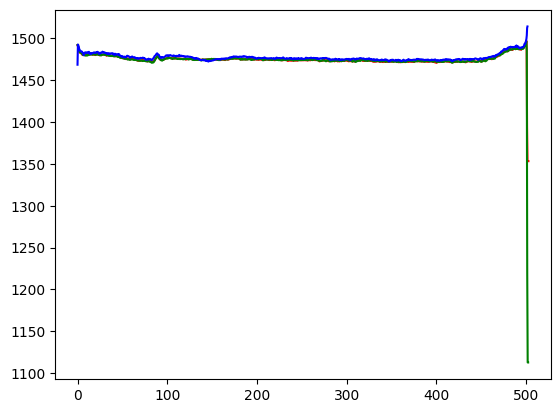

In [88]:
def visualize_measurments():
    measurement = label_observation()

    b2 = measurement[0].items()
    b3 = measurement[1].items()
    b5 = measurement[2].items()
    
    
    x_2, y_2 = zip(*b2)
    x_3, y_3 = zip(*b3)
    x_5, y_5 = zip(*b5)

    plt.plot(x_2, y_2, color = 'r')
    plt.plot(x_3, y_3, color = 'g')
    plt.plot(x_5, y_5, color = 'b')

    plt.show()
visualize_measurments()
    